# Домашка 
---------------------------------------

tldr:
    
* Выбрать архитектуру из рассказанных NST, pix2pix, CycleGAN$^1$
* Подберите к ней задачу, чтобы она вам нравилась
* Подберите еще одну задачу, которая уже решена (если не NST)
* Повторите решение, которое уже есть$^2$ (если не NST)
* Решите свою задачу

---------------------------------------
1. Расположены в порядке возрастания сложности и крутизны
2. Поверьте если вы сделаете этот пункт следующий будет в *разы* легче

## Если вы выбрали Neural Style Transfer
---------------------------------------
Тут все довольно просто на первый и на второй взгляд. Поэтому недосотаточно просто написать свою функцию потерь и сдать ноутбук. Если вы хотите приличных баллов, то у вас есть две опции:


1. Вы разделяете картинку на две части и переносите на них разные стили. <p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала к одной чати картинки, а потом к другой.</span></p> От вас ожидается, что вы отдадите нейросети два картинки стиля и она внутри себя(скорее внутри лосс функции) разделит выходную картинку на две части и к одной части применит один стиль, а к другой - второй. 

2. Вы переносите *одновременно* два стиля на одну картинку контента.
<p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала с одним стилем, а потом с другим.</span></p>
От вас ожидается, что вы модифицируете модель(скорее лосс модели) для того, чтобы два стиля учитывались с разными весами. 

## Если вы выбрали pix2pix
---------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для pix2pix модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все безплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Если вы выбрали CycleGAN
--------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для CycleGAN модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. CycleGAN в этом смысле хуже, чем pix2pix, он ест больше памяти. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все беcплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Remarks:
-----------------------------------------

* Это задание нужно для того, чтобы вы наступили на все грабли, что есть. Узнали об их существовании и научились обходить. Посмотрели на неработающие модели и поняли, что все тлен. Изгуглили весь интернет и в конце заставили это все работать. Поверьте, оно того стиот. Не откладывайте это задание на ночь перед сдачей, так как весь смысл \*пуф\* улетучится.

* У вас два союзника в этой борьбе:
    1. Оригинальная статья, те психи, что ее писала как то заставили свою модель работать. Их мысли, которыми они спроводили свое детище, позволят вам написать свой вариант алгоритма. 
    2. Гугл, он знает ответы на почти все ваши вопросы, но у него есть две ипостаси одна простая в обещении и вы все ее занаете(русскоязычная), а есть еще одна, которая кусается, но знает больше(англоязычная). Если не знаете языва - учите на ходу :)
    
* На самом деле у вас есть еще один союзник, это ментор проекта(или лектор или семинарист). Его ресурсом нужно пользоваться в ситуации, в которой вы не можете(занчит попытались и не вышло) найти ответов, используя Гугл и статью.

* Сдавать это все нужно следующим образом. Код вы кидаете на github и отправляете ссылку туда, куда вам сказали(в телеграм, степик или еще куда-то)

In [ ]:
%matplotlib inline
from PIL import Image

import numpy as np


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt


import torchvision.transforms as transforms
import torchvision.models as models

import copy

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
size=300

In [ ]:
loader = transforms.Compose([
                             transforms.Resize(size=size),
                             transforms.CenterCrop(size=size),
                             transforms.ToTensor()
])

In [ ]:
def image_loader(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
mask = image_loader("/content/drive/MyDrive/pad_2.jpg")

In [ ]:
style_1 = image_loader("/content/drive/MyDrive/symmetry-_thumb.jpg")
style_2 = image_loader("/content/drive/MyDrive/wall.jpg")

In [ ]:
unloader = transforms.ToPILImage() # тензор в кратинку  

plt.ion() 

def imshow(tensor, title=None, cmap=None):
    image = tensor.cpu().clone()   
    image = image.squeeze(0)      # функция для отрисовки изображения
    image = unloader(image)
    plt.imshow(image, cmap)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 

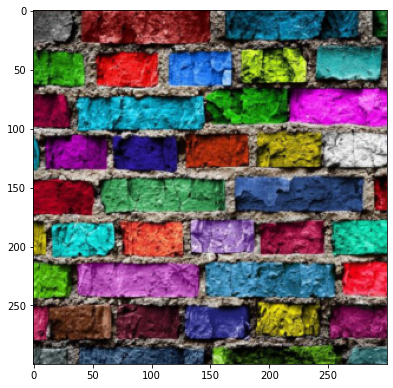

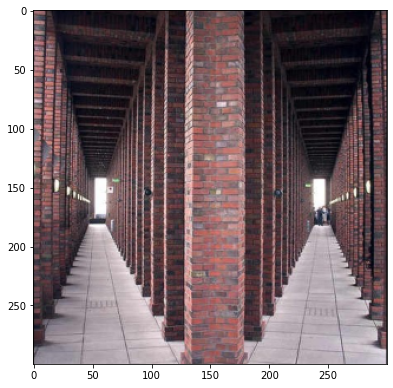

In [ ]:
# отрисовка стилей 

plt.figure(figsize=(6.5, 6.5))
imshow(style_1)

plt.figure(figsize=(6.5, 6.5))
imshow(style_2)

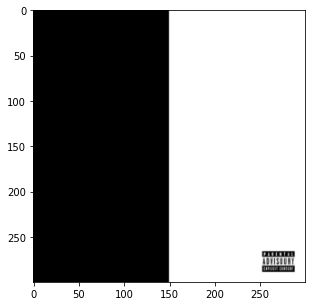

In [ ]:
# отрисовка шаблонов 

plt.figure(figsize=(5, 5))
imshow(mask, cmap='gray')


$$ L = \alpha L_{content} + \beta L_{style}$$

In [ ]:
# Content Loss

class ContentLoss(nn.Module):
  def __init__(self, target,):
            super(ContentLoss, self).__init__()
            self.target = target.detach()
            self.loss = F.mse_loss(self.target, self.target )

  def forward(self, input):
            self.loss = F.mse_loss(input, self.target)
            return input

In [ ]:
def G_matrix(input):
  batch, height, width, f_map = input.size()
  features = input.view(batch * height, width * f_map)
  G = torch.mm(features, features.t())
  return G.div(batch * height * width * f_map)

In [ ]:
class StyleLoss(nn.Module):
        def __init__(self, target_feature, mask):
          super(StyleLoss, self).__init__()

          _, s, r, _ = target_feature.size()
          resize = transforms.Compose([transforms.Resize(size=r)])
          self.iter = int(np.log2([s])[0])
          self.mask = resize(mask)

          for _ in range(self.iter): #concatinate masks to get a required size
            self.mask = torch.cat((self.mask, self.mask), dim=1)
          
          if self.mask.size() != target_feature.size(): #check size 
            print(self.mask.size(), target_feature.size())
            raise ValueError
          
          target_feature = target_feature * self.mask #elementwise multiplication
          self.target = G_matrix(target_feature).detach()
          self.loss = F.mse_loss(self.target, self.target) # to initialize with something

        def forward(self, input):
          if self.mask.size() != input.size():
            print(self.mask, input.size())
            raise ValueError

          input = input * self.mask
          G = G_matrix(input)
          self.loss = F.mse_loss(G, self.target)
          return input

In [ ]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

In [ ]:
class Normalization(nn.Module):
        def __init__(self, mean, std):
            super(Normalization, self).__init__()
            # .view the mean and std to make them [C x 1 x 1] so that they can
            # directly work with image Tensor of shape [B x C x H x W].
            # B is batch size. C is number of channels. H is height and W is width.
            self.mean = torch.tensor(mean).view(-1, 1, 1)
            self.std = torch.tensor(std).view(-1, 1, 1)

        def forward(self, img):
            # normalize img
            return (img - self.mean) / self.std

In [ ]:
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

In [ ]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


In [ ]:
def get_style_model_and_losses(cnn, mask, normalization_mean, normalization_std,
                                   style_img, content_img,
                                   content_layers=content_layers_default,
                                   style_layers=style_layers_default):
        cnn = copy.deepcopy(cnn)

        # normalization module
        normalization = Normalization(normalization_mean, normalization_std).to(device)

        # just in order to have an iterable access to or list of content/syle
        # losses
        content_losses = []
        style_losses = []

        # assuming that cnn is a nn.Sequential, so we make a new nn.Sequential
        # to put in modules that are supposed to be activated sequentially
        model = nn.Sequential(normalization)

        i = 0  # increment every time we see a conv
        for layer in cnn.children():
            if isinstance(layer, nn.Conv2d):
                i += 1
                name = 'conv_{}'.format(i)
            elif isinstance(layer, nn.ReLU):
                name = 'relu_{}'.format(i)
                # The in-place version doesn't play very nicely with the ContentLoss
                # and StyleLoss we insert below. So we replace with out-of-place
                # ones here.
                #Переопределим relu уровень
                layer = nn.ReLU(inplace=False)
            elif isinstance(layer, nn.MaxPool2d):
                name = 'pool_{}'.format(i)
            elif isinstance(layer, nn.BatchNorm2d):
                name = 'bn_{}'.format(i)
            else:
                raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

            model.add_module(name, layer)

            if name in content_layers:
                # add content loss:
                target = model(content_img).detach()
                content_loss = ContentLoss(target)
                model.add_module("content_loss_{}".format(i), content_loss)
                content_losses.append(content_loss)

            if name in style_layers:
                # add style loss:
                target_feature = model(style_img).detach()
                style_loss = StyleLoss(target_feature, mask)
                model.add_module("style_loss_{}".format(i), style_loss)
                style_losses.append(style_loss)

        # now we trim off the layers after the last content and style losses
        #выбрасываем все уровни после последенего styel loss или content loss
        for i in range(len(model) - 1, -1, -1):
            if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
                break

        model = model[:(i + 1)]

        return model, style_losses, content_losses

In [ ]:
def get_input_optimizer(input_img):
        # this line to show that input is a parameter that requires a gradient
        #добоваляет содержимое тензора катринки в список изменяемых оптимизатором параметров
        optimizer = optim.LBFGS([input_img.requires_grad_()]) 
        return optimizer

In [ ]:
def run_style_transfer(cnn, mask, normalization_mean, normalization_std,
                        content_img, style_img, input_img, num_steps=500,
                        style_weight=100000, content_weight=1):
        """Run the style transfer."""
        print('Building the style transfer model..')
        model, style_losses, content_losses = get_style_model_and_losses(cnn, mask,
            normalization_mean, normalization_std, style_img, content_img)
        optimizer = get_input_optimizer(input_img)

        print('Optimizing..')
        run = [0]
        while run[0] <= num_steps:

            def closure():
                # correct the values 
                # это для того, чтобы значения тензора картинки не выходили за пределы [0;1]
                input_img.data.clamp_(0, 1)

                optimizer.zero_grad()

                model(input_img)

                style_score = 0
                content_score = 0

                for sl in style_losses:
                    style_score += sl.loss
                for cl in content_losses:
                    content_score += cl.loss
                
                #взвешивание ощибки
                style_score *= style_weight
                content_score *= content_weight

                loss = style_score + content_score
                loss.backward()

                run[0] += 1
                if run[0] % 50 == 0:
                    print("run {}:".format(run))
                    print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                        style_score.item(), content_score.item()))
                    print()

                return style_score + content_score

            optimizer.step(closure)

        # a last correction...
        input_img.data.clamp_(0, 1)

        return input_img

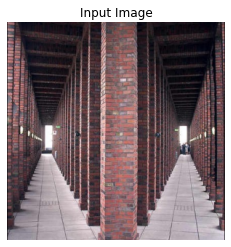

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


run [50]:
Style Loss : 10.678638 Content Loss: 15.289323

run [100]:
Style Loss : 2.386720 Content Loss: 12.234165

run [150]:
Style Loss : 1.497534 Content Loss: 11.247045

run [200]:
Style Loss : 1.261492 Content Loss: 10.867299

run [250]:
Style Loss : 1.203249 Content Loss: 10.709762

run [300]:
Style Loss : 1.362713 Content Loss: 10.633105

run [350]:
Style Loss : 1.401045 Content Loss: 10.735383



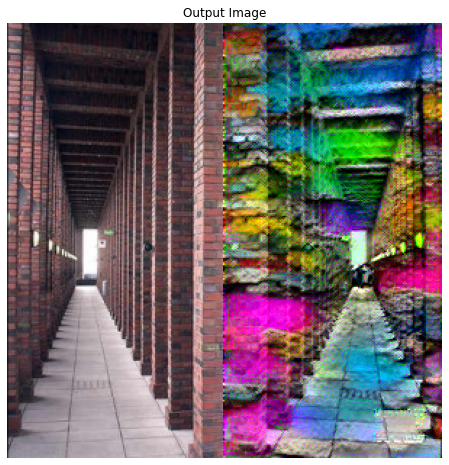

In [ ]:
input_img = style_1.clone()

plt.figure()
plt.axis('Off')
imshow(input_img, title='Input Image')
output = run_style_transfer(cnn, mask, cnn_normalization_mean, cnn_normalization_std,
                            content_img=style_1, style_img=style_2, input_img=input_img, 
                            num_steps=350, style_weight=100000, content_weight=1)

plt.figure(figsize=(8, 8))
plt.axis('Off')
imshow(output, title='Output Image')

plt.ioff()
plt.show()

In [ ]:
style_1 = image_loader("/content/drive/MyDrive/nature.jpg")
style_2 = image_loader("/content/drive/MyDrive/spring3.jpg")

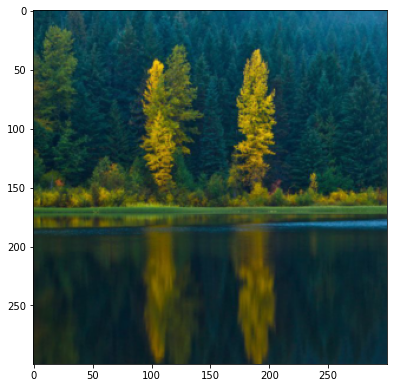

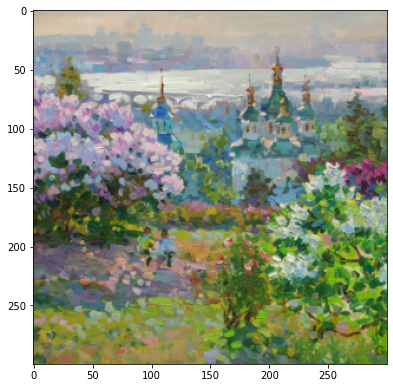

In [ ]:
# отрисовка стилей 

plt.figure(figsize=(6.5, 6.5))
imshow(style_1)

plt.figure(figsize=(6.5, 6.5))
imshow(style_2)

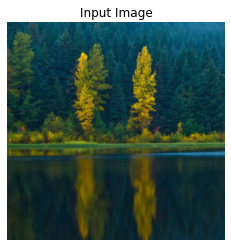

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


run [50]:
Style Loss : 2.029505 Content Loss: 7.475640

run [100]:
Style Loss : 1.199775 Content Loss: 4.669858

run [150]:
Style Loss : 0.963081 Content Loss: 3.838003

run [200]:
Style Loss : 0.797218 Content Loss: 3.518258

run [250]:
Style Loss : 0.702616 Content Loss: 3.369815

run [300]:
Style Loss : 0.646892 Content Loss: 3.292274

run [350]:
Style Loss : 0.604398 Content Loss: 3.252971

run [400]:
Style Loss : 0.577260 Content Loss: 3.227586

run [450]:
Style Loss : 0.558947 Content Loss: 3.208246

run [500]:
Style Loss : 0.543801 Content Loss: 3.190922



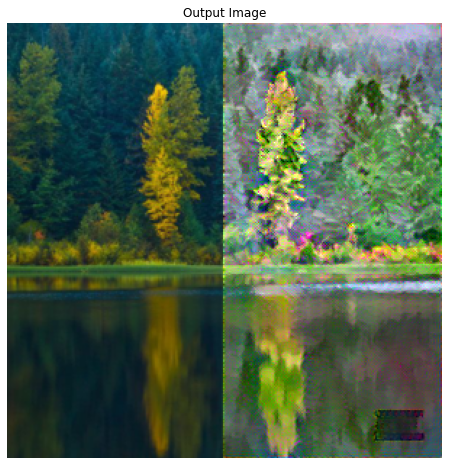

In [ ]:
input_img = style_1.clone()

plt.figure()
plt.axis('Off')
imshow(input_img, title='Input Image')
output = run_style_transfer(cnn, mask, cnn_normalization_mean, cnn_normalization_std,
                            content_img=style_1, style_img=style_2, input_img=input_img, 
                            num_steps=500, style_weight=100000, content_weight=1)

plt.figure(figsize=(8, 8))
plt.axis('Off')
imshow(output, title='Output Image')

plt.ioff()
plt.show()